In [103]:
!wget -O German_CreditData.csv https://raw.githubusercontent.com/devinaadinda/German-Credit-Risk/master/German_CreditData.csv

--2019-12-12 22:32:37--  https://raw.githubusercontent.com/devinaadinda/German-Credit-Risk/master/German_CreditData.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54394 (53K) [text/plain]
Saving to: ‘German_CreditData.csv’

German_CreditData.c 100%[===================>]  53.12K  --.-KB/s    in 0.008s  

2019-12-12 22:32:37 (6.86 MB/s) - ‘German_CreditData.csv’ saved [54394/54394]



In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time as time
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

%matplotlib inline
sns.set()
import warnings                       # Ignore warning related to pandas_profiling
warnings.filterwarnings('ignore') 

def annot_plot_num(ax,w,h):              # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h)) 

def annot_plot(ax,w,h):                  # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', rotation=0, xytext=(0, 10), textcoords='offset points')

In [105]:
df = pd.read_csv("German_CreditData.csv")
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [106]:
df.rename(columns=lambda x:x.replace('Unnamed: 0','id'), inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
id                  1000 non-null int64
Age                 1000 non-null int64
Sex                 1000 non-null object
Job                 1000 non-null int64
Housing             1000 non-null object
Saving accounts     817 non-null object
Checking account    606 non-null object
Credit amount       1000 non-null int64
Duration            1000 non-null int64
Purpose             1000 non-null object
Risk                1000 non-null object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [0]:
df['Checking account'].fillna('no-info', inplace = True)
df['Saving accounts'].fillna('no-info', inplace = True)

melihat jumlah data atribut risk

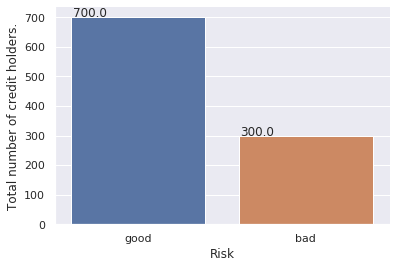

In [108]:
ax = sns.countplot('Risk', data = df)
plt.ylabel('Total number of credit holders.')
annot_plot_num(ax,0.008,1)
plt.show()

#**Preprocess Data**

mengubah nilai data kategorikal menjadi numerik

In [109]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Sex'] = le.fit_transform(df['Sex'])
df['Housing'] = le.fit_transform(df['Housing'])
df['Purpose'] = le.fit_transform(df['Purpose'])
df['Risk'] = le.fit_transform(df['Risk'])
df['Saving accounts'] = le.fit_transform(df['Saving accounts'])
df['Checking account'] = le.fit_transform(df['Checking account'])
df.head()

,id,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,1,2,1,2,0,1169,6,5,1
1,1,22,0,2,1,0,1,5951,48,5,0
2,2,49,1,1,1,0,2,2096,12,3,1
3,3,45,1,2,0,0,0,7882,42,4,1
4,4,53,1,2,0,0,0,4870,24,1,0


hasil risk dengan numerik good = 1 dan bad = 0

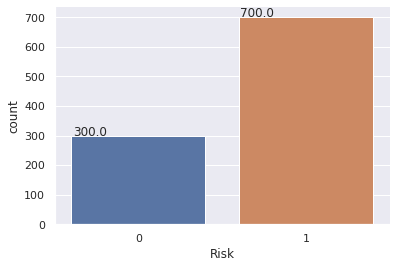

In [110]:
ax = sns.countplot('Risk', data = df)
annot_plot_num(ax, 0.008, 1)
plt.show()

**Korelasi Data**

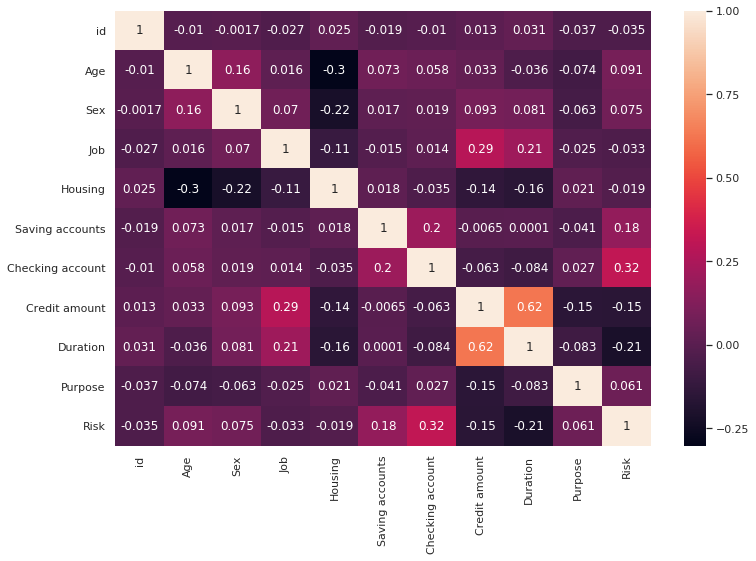

In [111]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot = True)
plt.show()

- buat variabel x dan y
- split dataset

In [0]:
y = df['Risk']
X = df.drop(['Risk','id'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 200)

transform data

In [0]:
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

#**MODEL**

**Random Forest Classifier**

In [114]:
from sklearn.ensemble import RandomForestClassifier
start = time.time()
rfc_clf = RandomForestClassifier()
rfc_clf.fit(X_train,y_train)
rfc_clf_pred = rfc_clf.predict(X_test)
akurasi_rfc = accuracy_score(rfc_clf_pred,y_test) 

print('Data Aktual:')
print(y_test.ravel())

print('Hasil Prediksi:')
print(rfc_clf_pred)

print('Confusion Matrix:', confusion_matrix(rfc_clf_pred,y_test).ravel()) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(rfc_clf_pred,y_test))

time_rfc = time.time()-start
print('total time:', time_rfc)

Data Aktual:
[0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
Hasil Prediksi:
[1 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 0
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0]
Confusion Matrix: [ 27  24  28 121]
Classification report:
              precision    recall  f1-score   support

           0       0.49      0.53      0.51

**Support Vector Classifier**

In [115]:
from sklearn.svm import SVC
start = time.time()
svc_clf = SVC()
svc_clf.fit(X_train,y_train)
svc_pred = svc_clf.predict(X_test)
akurasi_svc = accuracy_score(svc_pred,y_test)

print('Data Aktual:')
print(y_test.ravel())

print('Hasil Prediksi:')
print(svc_pred)

print('Confusion Matrix:', confusion_matrix(svc_pred,y_test)) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(svc_pred,y_test))

time_svc = time.time()-start
print('total time:', time_svc)

Data Aktual:
[0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
Hasil Prediksi:
[1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0]
Confusion Matrix: [[ 17  11]
 [ 38 134]]
Classification report:
              precision    recall  f1-score   support

           0       0.31      0.61     

**Logistic Regresion**

In [116]:
from sklearn.linear_model import LogisticRegression
start = time.time()
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
akurasi_lr = accuracy_score(lr_pred,y_test)

print('Data Aktual:')
print(y_test.ravel())

print('Hasil Prediksi:')
print(lr_pred)

print('Confusion Matrix:', confusion_matrix(lr_pred,y_test)) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(lr_pred,y_test))

time_lr = time.time()-start
print('total time:', time_lr)

Data Aktual:
[0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
Hasil Prediksi:
[1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0]
Confusion Matrix: [[ 21  11]
 [ 34 134]]
Classification report:
              precision    recall  f1-score   support

           0       0.38      0.66     

**Gradient Boosting Classifier**

In [117]:
from sklearn.ensemble import GradientBoostingClassifier
start = time.time()
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
gbc_pred = gbc.predict(X_test)
akurasi_gbc = accuracy_score(gbc_pred,y_test)

print('Data Aktual:')
print(y_test.ravel())

print('Hasil Prediksi:')
print(gbc_pred)

print('Confusion Matrix:', confusion_matrix(gbc_pred,y_test)) #tn,fp,fn,tp
print('Classification report:')
print(classification_report(gbc_pred,y_test))

time_gbc = time.time()-start
print('total time:', time_gbc)

Data Aktual:
[0 1 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 1 0
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1
 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0
 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0]
Hasil Prediksi:
[1 0 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1
 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]
Confusion Matrix: [[ 22  15]
 [ 33 130]]
Classification report:
              precision    recall  f1-score   support

           0       0.40      0.59     

In [120]:
models = pd.DataFrame({'Models':['Random Forest Classifier', 'Support Vector Classifier', 'Logistic Regression', 'Gradient Boost Classifier'],
                       'Akurasi':[akurasi_rfc ,akurasi_svc, akurasi_lr, akurasi_gbc],
                       'Waktu':[time_rfc ,time_svc, time_lr, time_gbc]})
models.sort_values(by='Akurasi', ascending = False)

,Models,Akurasi,Waktu
2,Logistic Regression,0.775,0.016103
3,Gradient Boost Classifier,0.760,0.099944
1,Support Vector Classifier,0.755,0.038585
0,Random Forest Classifier,0.740,0.043964


**ROC, AUC**

ROC : untuk mempermudah identifikasi best threshold

AUC : untuk membantu kategorikan metode yg lebih baik 

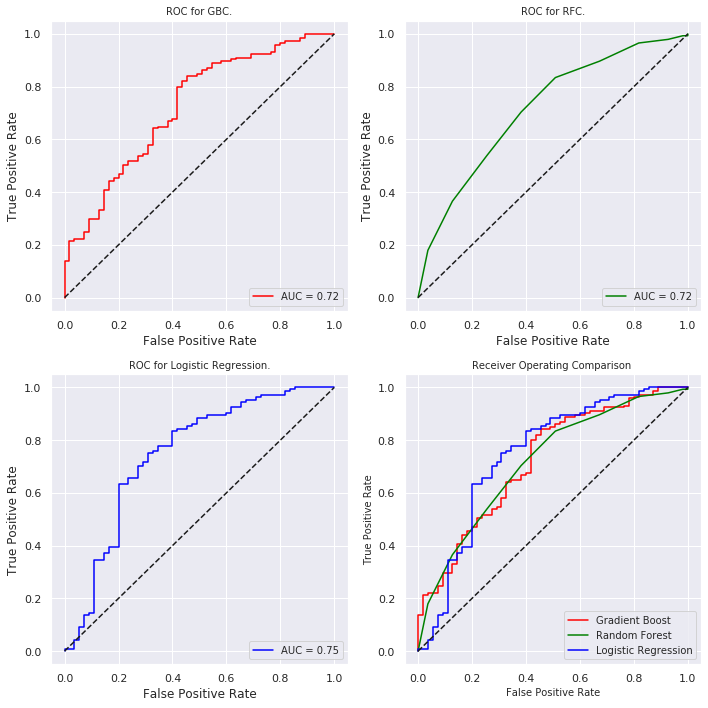

In [119]:
fig, ax_arr = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))

from sklearn import metrics

#gbc
gbc_prob = gbc.predict_proba(X_test)[:,1]
fprgbc, tprgbc, thresholdsgbc = metrics.roc_curve(y_test, gbc_prob)
roc_auc_gbc = metrics.auc(fprgbc,tprgbc)
ax_arr[0,0].plot(fprgbc, tprgbc,'b',label = 'AUC = %0.2f' % roc_auc_gbc,color = 'red')
ax_arr[0,0].plot([0, 1], [0, 1], 'k--')
ax_arr[0,0].set_xlabel('False Positive Rate')
ax_arr[0,0].set_ylabel('True Positive Rate')
ax_arr[0,0].set_title('ROC for GBC.', fontsize = 10)
ax_arr[0,0].legend(loc = 'lower right', prop={'size': 10})

#Random forest
rfc_prob = rfc_clf.predict_proba(X_test)[:,1]
fprRfc, tprRfc, thresholdsRfc = metrics.roc_curve(y_test, rfc_prob)
roc_auc_rfc = metrics.auc(fprRfc,tprRfc)
ax_arr[0,1].plot(fprRfc, tprRfc,'b',label = 'AUC = %0.2f' % roc_auc_rfc,color = 'green')
ax_arr[0,1].plot([0, 1], [0, 1], 'k--')
ax_arr[0,1].set_xlabel('False Positive Rate')
ax_arr[0,1].set_ylabel('True Positive Rate')
ax_arr[0,1].set_title('ROC for RFC.', fontsize = 10)
ax_arr[0,1].legend(loc = 'lower right', prop={'size': 10})

#Logistic Regression
lr_prob = lr.predict_proba(X_test)[:,1]
fprLr, tprLr, thresholdsLr = metrics.roc_curve(y_test, lr_prob)
roc_auc_lr = metrics.auc(fprLr,tprLr)
ax_arr[1,0].plot(fprLr, tprLr,'b',label = 'AUC = %0.2f' % roc_auc_lr,color = 'blue')
ax_arr[1,0].plot([0, 1], [0, 1], 'k--')
ax_arr[1,0].set_xlabel('False Positive Rate')
ax_arr[1,0].set_ylabel('True Positive Rate')
ax_arr[1,0].set_title('ROC for Logistic Regression.', fontsize = 10)
ax_arr[1,0].legend(loc = 'lower right', prop={'size': 10})

#For All
ax_arr[1,1].plot(fprgbc,tprgbc, label ='Gradient Boost', color = 'red')
ax_arr[1,1].plot(fprRfc,tprRfc, label ='Random Forest', color = 'green')
ax_arr[1,1].plot(fprLr,tprLr, label ='Logistic Regression', color = 'blue')
ax_arr[1,1].plot([0, 1], [0, 1], 'k--')
ax_arr[1,1].set_title('Receiver Operating Comparison ',fontsize=10)
ax_arr[1,1].set_ylabel('True Positive Rate',fontsize=10)
ax_arr[1,1].set_xlabel('False Positive Rate',fontsize=10)
ax_arr[1,1].legend(loc = 'lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.2)
plt.tight_layout() 
plt.show()